In [34]:
import pandas as pd, numpy as np
import ipywidgets as widgets
from IPython.display import display
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Monte Carlo

$\frac{S_{t+dt}-S_t}{S_t}=\mu dt+\sigma\sqrt{dt}\xi $

In [10]:
p = erk.gbm(10, n_scenarios=3)
p

,0,1,2
0,100.000000,100.000000,100.000000
1,94.143442,100.828828,94.292837
2,98.652607,107.127893,97.169767
3,95.729481,113.033484,93.544600
4,94.896486,116.379523,91.077641
...,...,...,...
115,218.548327,190.009816,160.322120
116,210.294952,186.274202,167.526350
117,206.793452,192.516597,168.163404
118,216.067880,195.040151,157.632404


# GBM Interactive plots

In [11]:
def show_gbm(n_scenarios, mu, sigma):
    """ 
    Draw results of a stock price evolution under a GBM model
    """
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    # Draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

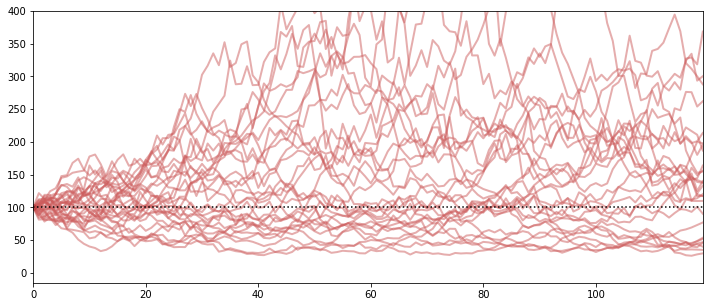

In [12]:
show_gbm(30, 0.07, 0.3)

In [13]:
gbm_controls = widgets.interactive(show_gbm, 
                                  n_scenarios = (1, 20, 1),
                                  mu = (-0.2, 0.2, 0.1),
                                  sigma = (0, 0.3, 0.01))

In [14]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [15]:
n_scenarios=50; mu=0.07; sigma=0.15; m=3; floor=0.; riskfree_rate=0.03; y_max=100

In [56]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0, riskfree_rate=0.03, y_max=100, steps_per_year=12):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    
    start = 100
    sim_ret = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_ret)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate = riskfree_rate, m=m, start=start, floor=floor)
    # Run the backtest
    btr = erk.run_cppi(risky_r=risky_r, riskfree_rate = riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    
    # calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0
    
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(0.7, 0.9), xycoords="axes fraction", fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(0.7, 0.85), xycoords="axes fraction", fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(0.7, 0.6), xycoords="axes fraction", fontsize=24)
                         
                         

In [57]:
erk.gbm()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.759436,101.637640,101.755629,103.992704,103.266661,97.696297,105.393295,99.698604,99.877677,109.847224,...,100.272187,104.199199,104.507910,104.620978,105.975813,93.645209,100.573797,105.212007,103.026981,100.917844
2,103.008065,104.785227,102.089303,100.575521,103.499375,102.909846,103.981962,101.448499,98.141228,112.480988,...,98.345296,102.557598,110.597208,98.910181,112.527105,93.590295,93.167558,100.443194,108.046020,105.176618
3,104.894684,110.412723,100.920225,96.178484,103.535307,105.847287,100.421769,100.668825,91.967681,116.862990,...,93.982965,105.486147,107.960346,98.101309,119.110532,94.184324,99.944470,97.717114,104.308756,106.329536
4,98.219019,112.024363,98.756010,97.428951,106.982764,98.377171,102.832916,100.952561,86.936951,120.057570,...,95.021281,107.879696,111.221222,109.587694,124.206644,87.308336,107.359654,101.179978,109.428251,105.021919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,341.129436,246.424561,186.009088,171.005989,339.413543,126.904218,188.860531,189.847587,124.399754,405.987844,...,126.046010,186.938511,240.007533,332.528578,303.925340,163.208692,256.430871,139.343154,162.708479,186.263599
116,322.248315,248.329949,165.939416,161.438304,349.929656,133.748756,177.333822,189.742018,133.507113,413.570573,...,124.748173,171.725384,248.834277,338.320804,302.813472,162.556550,257.307555,131.560269,177.337092,185.279331
117,314.031525,248.949046,167.977197,157.572107,340.702511,126.240010,178.983831,183.802452,136.128831,429.816388,...,120.979656,176.677993,244.784899,342.638895,307.629911,160.128314,274.628664,127.195918,177.263598,199.042594
118,313.201266,244.017113,180.630002,164.143417,322.115394,128.410241,168.538013,174.262699,123.580493,436.391626,...,122.350049,168.714224,249.494102,337.703548,316.893851,180.066396,292.735194,128.914771,173.009342,198.845022


In [60]:
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=500, step=5, value=50),
                                   mu=(0.0, 0.2, 0.01),
                                   sigma=(0, 0.5, 0.05),
                                   floor=(0, 2, 0.1),
                                   m=(1, 5, 0.5),
                                   riskfree_rate=(0, 0.05, 0.01),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description="Num of rebal in a year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=500, min=1, step=5), FloatSlider(valu…